In [28]:
# Basic Libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

data = pd.read_csv('data/col_data.csv', encoding="latin-1")

---
### DBSCAN

In [29]:
# year, track_name, track_popularity, album, artist_name, artist_genres, artist_popularity, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, duration_ms, time_signature 

def scatterplot(colx, coly):
    df = pd.DataFrame(data[[colx, coly]])
    plt.scatter(df[colx], df[coly])
    plt.show()
    # sb.jointplot(data=df, x=colx, y=coly, height=7)
    return df

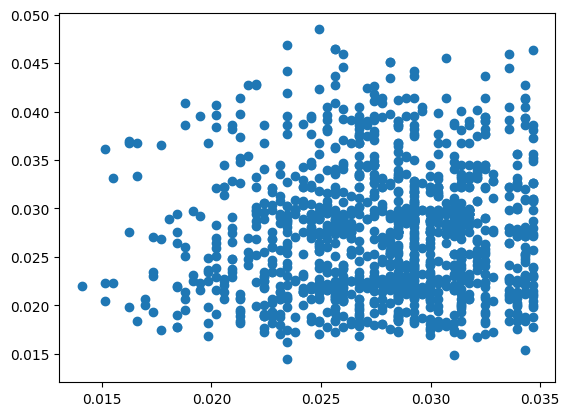

In [30]:
# keep: track_popularity / artist_popularity, artist_popularity / tempo, danceability / energy, danceability - valence, energy / acousticness, energy / liveness, energy / valence, 
# ?: 'track_popularity - tempo', alot of noise in dbscan

#  'speechiness - acousticness', 'speechiness - instrumentalness', 'speechiness - liveness', 'speechiness - valence', 'speechiness - tempo', 'acousticness - liveness', 'acousticness - valence', 'acousticness - tempo', 'liveness - valence', 'liveness - tempo', 'valence - tempo'
epsi = 0.0007
minsam = 4
k = 15
colx = "artist_pop_norm"
coly = "tempo_norm"
df = scatterplot(colx, coly)

In [31]:
from sklearn import metrics
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=epsi, min_samples=minsam).fit(df)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Silhouette Coefficient: {metrics.silhouette_score(df, labels):.3f}")

Estimated number of clusters: 34
Estimated number of noise points: 237
Silhouette Coefficient: -0.270


---
### K-Means

In [32]:
from sklearn.cluster import KMeans

kmeanspp = KMeans(n_clusters=k).fit(df)
kmeanspp.labels_

array([ 3,  8, 13, ..., 11,  3, 14])

In [33]:
kmeans = KMeans(n_clusters=k, init="random").fit(df)
kmeans.labels_

array([11,  8, 13, ...,  1, 11, 12])

---
### Graphs

<Axes: xlabel='artist_pop_norm', ylabel='tempo_norm'>

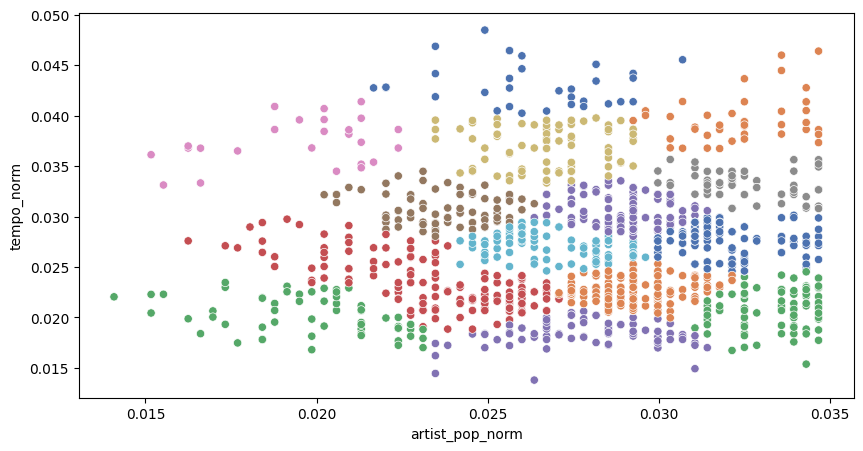

In [34]:
# Kmeans
fig, ax = plt.subplots(figsize=(10, 5))
sb.scatterplot(data=df, x=colx, y=coly, hue=kmeans.labels_, ax=ax, legend=False, palette="deep")

<Axes: xlabel='artist_pop_norm', ylabel='tempo_norm'>

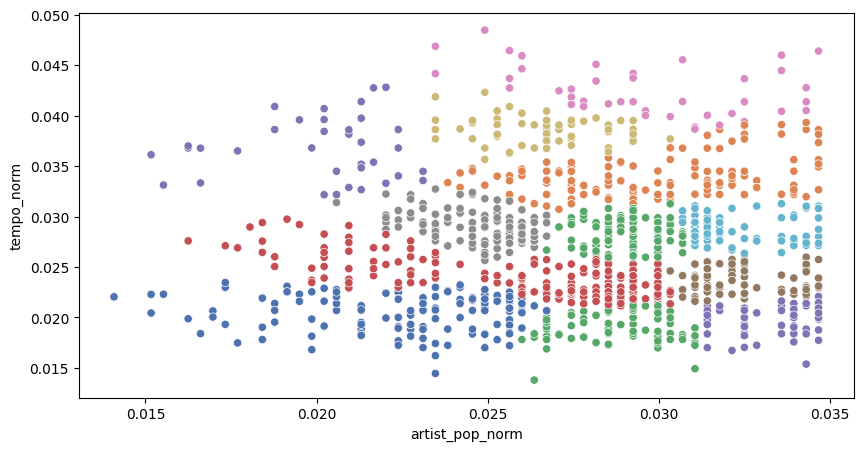

In [35]:
# Kmeans++
fig, ax = plt.subplots(figsize=(10, 5))
sb.scatterplot(data=df, x=colx, y=coly, hue=kmeanspp.labels_, ax=ax, legend=False, palette="deep")

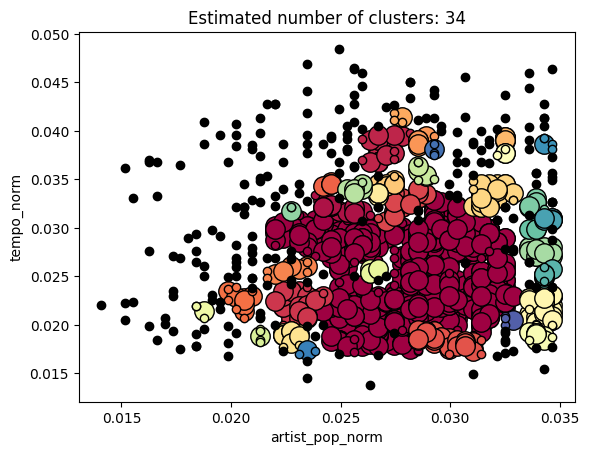

<Figure size 500x1000 with 0 Axes>

In [36]:
# DBScan
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # continue
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = df[class_member_mask & core_samples_mask]
    plt.plot(
        xy[colx],
        xy[coly],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[colx],
        xy[coly],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.xlabel(colx)
plt.ylabel(coly)
plt.figure(figsize=(5,10))
plt.show()